# Cardiotoxicity Prediction

## Work Plan

1. Data Exploration
2. Data Cleaning
3. Data Visualization

## Cele
* Classification vs Regression
* IC50 vs pIC50

In [2]:
from pathlib import Path

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

import numbers

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier

from sklearn.metrics import mean_squared_error, r2_score, matthews_corrcoef

from scipy.stats import pointbiserialr

In [3]:
DATA_PATH = Path.cwd() / 'data'
KLEKOTA_ROTH_DATA = DATA_PATH / 'cardiotoxicity_hERG_KlekFP_ready_set.csv'

In [4]:
klekota_roth_df = pd.read_csv(KLEKOTA_ROTH_DATA)

C:\Users\SG0306249\Miniconda3\envs\cardiotoxicity_prediction\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
klekota_roth_df.sample(10)

,IC50,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,...,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
7197,10000.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1070,2700.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
355,'=',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9445,1100.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8652,30.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4882,'=',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,15600.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4614,30000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10661,7400.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305,'=',1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(f'Number of rows: {klekota_roth_df.shape[0]}\nNumber of cols: {klekota_roth_df.shape[1]}')

Number of rows: 11504
Number of cols: 4861


In [7]:
def is_float(value):
    try:
        float(value)
        return True
    except:
        return False

In [8]:
klekota_roth_df[klekota_roth_df['IC50'].apply(lambda value: not(is_float(value)))]

,IC50,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,...,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
15,'=',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,'=',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,'=',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,27}]TRIACONTA-8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,'=',1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11421,'=',1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11454,'=',1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11480,'=',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11482,'>',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
klekota_roth_df = klekota_roth_df[klekota_roth_df['IC50'].apply(is_float)]

In [10]:
klekota_roth_df['IC50'] = klekota_roth_df['IC50'].astype('float64') 

In [11]:
klekota_roth_df[1:] = klekota_roth_df[1:].astype('int') 

In [12]:
print(klekota_roth_df.apply(lambda col: col.unique()))

IC50        [645.0, 6600.0, 1600.0, 6700.0, 21400.0, 20800...
KRFP1                                                  [0, 1]
KRFP2                                                  [0, 1]
KRFP3                                                  [0, 1]
KRFP4                                                     [0]
                                  ...                        
KRFP4856                                               [0, 1]
KRFP4857                                               [0, 1]
KRFP4858                                               [0, 1]
KRFP4859                                                  [0]
KRFP4860                                                  [0]
Length: 4861, dtype: object


### Remove columns without difference

In [13]:
columns_without_difference = [k for k,v in klekota_roth_df.apply(lambda col: col.unique()).apply(lambda x: len(x) == 1).items() if v]

len(columns_without_difference)

2760

In [14]:
klekota_roth_df = klekota_roth_df.drop(columns=columns_without_difference)

In [15]:
klekota_roth_df.apply(lambda col: col.unique()).sample(10)

KRFP1575    [0, 1]
KRFP1135    [0, 1]
KRFP1243    [0, 1]
KRFP4050    [0, 1]
KRFP2155    [0, 1]
KRFP2263    [0, 1]
KRFP4015    [0, 1]
KRFP585     [0, 1]
KRFP53      [0, 1]
KRFP3859    [0, 1]
dtype: object

In [16]:
def calculate_if_toxic(row):
    if row['IC50'] < 10000:
        return 1
    return 0

In [17]:
klekota_roth_df['toxic'] = klekota_roth_df.apply(calculate_if_toxic, axis=1)

In [18]:
klekota_roth_df['toxic'].value_counts()

0    5389
1    5246
Name: toxic, dtype: int64

In [58]:
klekota_roth_df

,IC50,KRFP1,KRFP2,KRFP3,KRFP7,KRFP8,KRFP10,KRFP13,KRFP14,KRFP16,...,KRFP4839,KRFP4842,KRFP4843,KRFP4849,KRFP4852,KRFP4853,KRFP4856,KRFP4857,KRFP4858,toxic
0,645.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6600.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1600.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6700.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6600.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11499,6600.0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11500,100000.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
11501,30000.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11502,26000.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
klekota_roth_df.to_csv(DATA_PATH / 'cardiotoxicity_hERG_KlekFP_processed.csv', index = False)

In [20]:
X = klekota_roth_df.drop(['IC50','toxic'], axis=1)
y = klekota_roth_df['toxic']

In [21]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier

In [22]:
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"Running GridSearchCV for {key} with params {self.params[key]}")
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [23]:
models={
#     'LogisticRegression': LogisticRegression(), 
#         'RidgeClassifier': RidgeClassifier(), 
#         'SGDClassifier': SGDClassifier(), 
        'SVC': SVC()
       }
params={
#     'LogisticRegression': {
#             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#             'penalty': ['l1', 'l2'],
#             'max_iter': list(range(100,800,100)),
#             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#         },
#         'RidgeClassifier': {
#             'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#          },
#         'SGDClassifier': {
#             'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#             'penalty': ['l1', 'l2', 'elasticnet'],
#             'max_iter': list(range(100,800,100)),
#             'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
#         },
        'SVC': {
            'C': [0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
    }

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(y_train)

7492     1
3883     1
9406     1
7590     0
4691     1
        ..
10638    1
8485     0
5745     0
1495     0
3958     1
Name: toxic, Length: 8508, dtype: int64


In [25]:
from sklearn.model_selection import GridSearchCV


helper1 = EstimatorSelectionHelper(models, params)
helper1.fit(X_train, y_train, scoring='f1', n_jobs=2, verbose=2)

Running GridSearchCV for SVC with params {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [26]:
helper1.score_summary().head(100)
#helper1.score_summary().loc[helper1.score_summary()['estimator'] == 'SGDClassifier'].head(10)


SVC


,estimator,min_score,mean_score,max_score,std_score,C,kernel
14,SVC,0.780592,0.788473,0.796776,0.006614,10,rbf
13,SVC,0.772825,0.783401,0.793091,0.008297,10,poly
17,SVC,0.763545,0.776975,0.791579,0.011475,100,poly
18,SVC,0.771102,0.776736,0.786816,0.007144,100,rbf
9,SVC,0.756204,0.766956,0.777271,0.008606,1,poly
10,SVC,0.749819,0.76318,0.779649,0.012375,1,rbf
8,SVC,0.740608,0.745398,0.754133,0.006186,1,linear
4,SVC,0.727667,0.743598,0.760962,0.01363,0.1,linear
12,SVC,0.725,0.73358,0.743437,0.007581,10,linear
16,SVC,0.722382,0.730844,0.737028,0.006192,100,linear


In [80]:
models=[LogisticRegression(), 
        RidgeClassifier(), 
        SGDClassifier(), 
        SVC()
       ]
params=[{
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'penalty': ['l1', 'l2'],
            'max_iter': list(range(100,800,100)),
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        },
        {
            'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
         },
        {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'penalty': ['l1', 'l2', 'elasticnet'],
            'max_iter': list(range(100,800,100)),
            'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
        },
        {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
            'shrinking': [True, False]
        }
]

In [82]:
from sklearn.model_selection import KFold, train_test_split, RepeatedKFold

best_results=[]
cv_results=pd.DataFrame()
kfold = KFold(n_splits=5, random_state=2652124, shuffle=True)
for idx, (train_index, test_index) in enumerate(kfold.split(X)):
    results=[]
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for model, grid_params, in zip(models, params):
        repeatedKfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=2652124)
        grid_search=GridSearchCV(estimator=model,param_grid=grid_params,scoring='f1',cv=repeatedKfold)
        grid_fit=grid_search.fit(X_train, y_train)
        results.append((grid_fit.best_estimator_, grid_fit.best_params_, grid_fit.best_score_*(-1)))
        cv_result=pd.DataFrame(grid_search.cv_results_)
        cv_result["Model"]=str(model)
        cv_results=cv_results.append(cv_result, ignore_index=True)
        
    res=pd.DataFrame(results, columns=['Model', 'Params','f1'])
    res=res.sort_values(by='f1').reset_index(drop=True)
    best=res.iloc[0]
    
    reg=best.Model
    reg.fit(X_train, y_train)
    Y_pred=reg.predict(X_test)

    mse=mean_squared_error(y_test, Y_pred)
    r2=r2_score(y_test, Y_pred)
    mae=mean_absolute_error(y_test, Y_pred)
    
    best_results.append({'Model' : reg, 'Params' : str(best.Params), 'MSE': mse, 'MAE': mae, 'R2' : r2})

    results=[]

KeyError: "None of [Int64Index([    1,     2,     4,     5,     6,     7,     8,     9,    10,\n               11,\n            ...\n            10623, 10625, 10626, 10628, 10629, 10630, 10631, 10632, 10633,\n            10634],\n           dtype='int64', length=8508)] are in the [columns]"

In [16]:
results = [matthews_corrcoef(klekota_roth_df['toxic'], klekota_roth_df[klekota_roth_df.columns[i]]) for i in range(1, 4861)]

In [25]:
[(i[0]+1, i[1]) for i in sorted(enumerate(results), key=lambda x:x[1])][-10:]

[(362, 0.11052112129774239),
 (638, 0.11171721772953916),
 (3741, 0.11349542958787509),
 (3752, 0.116537461243014),
 (3757, 0.12192553447030065),
 (2218, 0.13059796744138175),
 (458, 0.1547139782641981),
 (381, 0.17813347929841833),
 (620, 0.18259788340697514),
 (438, 0.18538712065559762)]

0.11052112129774239

In [ ]:
import seaborn as sns

Var_Corr = klekota_roth_df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

PointbiserialrResult(correlation=0.0072207570187819035, pvalue=0.4565311347168881)


In [25]:
from scipy import stats
a = klekota_roth_df[klekota_roth_df.columns[1]]
b = klekota_roth_df['IC50']

stats.pointbiserialr(a, b)

PointbiserialrResult(correlation=0.0072207570187819035, pvalue=0.4565311347168881)

In [26]:
np.corrcoef(a, b)

array([[1.        , 0.00722076],
       [0.00722076, 1.        ]])

<AxesSubplot:ylabel='IC50'>

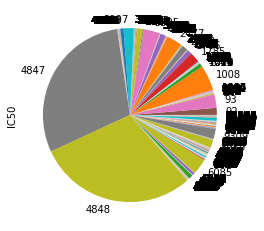

In [24]:
klekota_roth_df['IC50'].quantile(q=0.5)

10000.0

In [11]:
X = klekota_roth_df.drop('IC50', axis=1)
y = klekota_roth_df['IC50']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
random_forest_regressor = RandomForestRegressor(bootstrap=True, max_depth=None, max_features=1.0, max_samples=None, min_samples_leaf=2, min_samples_split=7, n_estimators=1000, verbose=2)

In [22]:
random_forest_regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building

building tree 322 of 1000
building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tre

building tree 638 of 1000
building tree 639 of 1000
building tree 640 of 1000
building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tre

building tree 954 of 1000
building tree 955 of 1000
building tree 956 of 1000
building tree 957 of 1000
building tree 958 of 1000
building tree 959 of 1000
building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 28.1min finished


RandomForestRegressor(max_features=1.0, min_samples_leaf=2, min_samples_split=7,
                      n_estimators=1000, verbose=2)

In [27]:
y_pred_train = random_forest_regressor.predict(X_train)
y_pred_test = random_forest_regressor.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.5s finished


In [31]:
RandomForestRegressor_results = pd.DataFrame({
    'algorithm':['RandomForestRegressor'],
    'training_r2_score': [r2_score(y_train, y_pred_train)],
    'test_r2_score': [r2_score(y_test, y_pred_test)]})
RandomForestRegressor_results

,algorithm,training_r2_score,test_r2_score
0,RandomForestRegressor,0.681827,-0.214611


In [28]:
extra_trees_classifier = ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_depth=20, max_features=0.9000000000000001, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=500, verbose=True)

In [13]:
def map_single_value_to_classification(value):
    low = 0
    medium = 1
    high = 2

    bottom_threshold = 0.6
    top_threshold = 2.32
    
    if value <= bottom_threshold:
        return low
    else:
        return medium if value <= top_threshold else high

def to_classification(values):
    low = 0
    medium = 1
    high = 2

    bottom_threshold = 0.6
    top_threshold = 2.32
    
    if isinstance(values, pd.Series):
        return values.map(lambda value: map_single_value_to_classification(value))
    else:
        raise NotImplementedError(f"Supported types for `values` are pd.Series, is {type(values)}.")

In [14]:
y_train = to_classification(y_train)

In [15]:
y_train.value_counts()

2    8444
1      42
0      22
Name: IC50, dtype: int64

In [69]:
extra_trees_classifier.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.5min finished


ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_depth=20,
                     max_features=0.9000000000000001, max_samples=0.5,
                     n_estimators=500, verbose=True)

In [16]:
y_test = to_classification(y_test)

In [71]:
y_pred_train = extra_trees_classifier.predict(X_train)
y_pred_test = extra_trees_classifier.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


In [73]:
ExtraTreesClassifier_results = pd.DataFrame({
    'algorithm':['ExtraTreesClassifier'],
    'training_r2_score': [r2_score(y_train, y_pred_train)],
    'test_r2_score': [r2_score(y_test, y_pred_test)]})
ExtraTreesClassifier_results

,algorithm,training_r2_score,test_r2_score
0,ExtraTreesClassifier,0.380473,-0.038607


In [20]:
y_test

2244     2
1214     2
6590     2
10804    2
1058     2
        ..
9385     2
3882     2
2259     2
7302     2
1818     2
Name: IC50, Length: 2127, dtype: int64

In [21]:
y_pred_test

NameError: name 'y_pred_test' is not defined

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models1 = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
#     'RandomForestClassifier': RandomForestClassifier(),
#     'AdaBoostClassifier': AdaBoostClassifier(),
#     'GradientBoostingClassifier': GradientBoostingClassifier(),
#     'SVC': SVC()
}
# bootstrap=True, criterion="entropy", max_depth=20, max_features=0.9000000000000001, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=500
params1 = {
    'ExtraTreesClassifier': { 'max_depth': [20],
                            'max_features': [0.9],
                            'max_samples': [0.5],
                            'n_estimators': [100]},
#     'RandomForestClassifier': { 'n_estimators': [16, 32] },
#     'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
#     'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
#     'SVC': [
#         {'kernel': ['linear'], 'C': [1, 10]},
#         {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
#     ]
}

In [19]:
from sklearn.model_selection import GridSearchCV

helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, scoring='f1', n_jobs=2, verbose=2)

Running GridSearchCV for ExtraTreesClassifier with params {'max_depth': [20], 'max_features': [0.9], 'max_samples': [0.5], 'n_estimators': [100]}
Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [21]:
helper1.score_summary(sort_by='max_score')

ExtraTreesClassifier


,estimator,min_score,mean_score,max_score,std_score,max_depth,max_features,max_samples,n_estimators
0,ExtraTreesClassifier,0.990091,0.990974,0.991859,0.000722,20,0.9,0.5,100


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

grid_XGBRegressor = GridSearchCV(XGBRegressor, param_grid, scoring='r2', cv=3, n_jobs=-1, return_train_score=True, verbose=1000)

grid_XGBRegressor.fit(X_train, y_train)

## Data Exploration

In [12]:
KLEKOTA_ROTH_DATA

WindowsPath('C:/Users/SG0306249/PycharmProjects/cardiotoxicity_prediction/data/cardiotoxicity_hERG_KlekFP_ready_set.csv')